In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


Bad key "text.kerning_factor" on line 4 in
C:\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


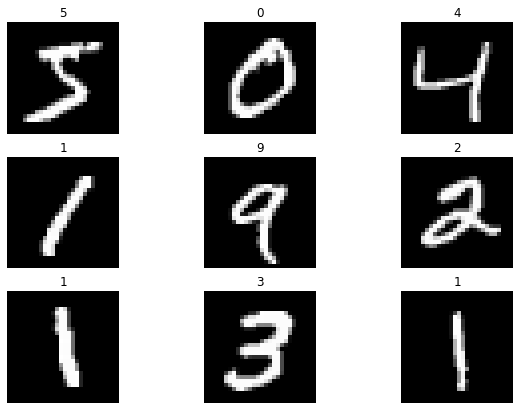

In [3]:
with open('./Exercise24/mnist.pkl', 'rb') as f:
    mnist = pickle.load(f)

plt.figure(figsize=(10, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(mnist['images'][i], cmap='gray')
    plt.title(mnist['labels'][i])
    plt.axis('off')

In [4]:
model_pca = PCA(n_components=30)
mnist_pca = model_pca.fit(mnist['images'].reshape((-1, 28 ** 2)))

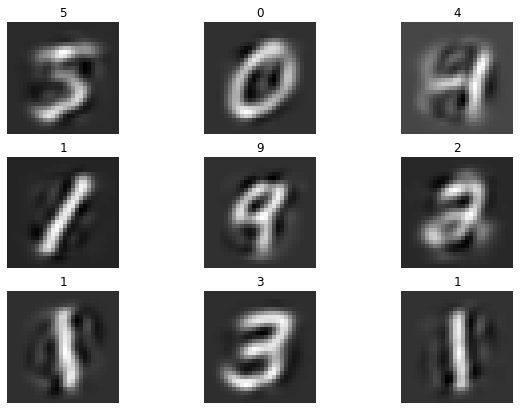

In [5]:
mnist_30comp = model_pca.transform(mnist['images'].reshape((-1, 28 ** 2)))
mnist_30comp_vis = model_pca.inverse_transform(mnist_30comp)
mnist_30comp_vis = mnist_30comp_vis.reshape((-1, 28, 28))

plt.figure(figsize=(10, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(mnist_30comp_vis[i], cmap='gray')
    plt.title(mnist['labels'][i])
    plt.axis('off')

In [6]:
model_tsne = TSNE(random_state=0, verbose=1)
model_tsne

TSNE(random_state=0, verbose=1)

In [7]:
mnist_tsne = model_tsne.fit_transform(mnist_30comp)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.079s...
[t-SNE] Computed neighbors for 10000 samples in 8.137s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 307.001654
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.522858
[t-SNE] KL divergence after 1000 iterations: 1.699898


In [8]:
mnist_tsne.shape

(10000, 2)

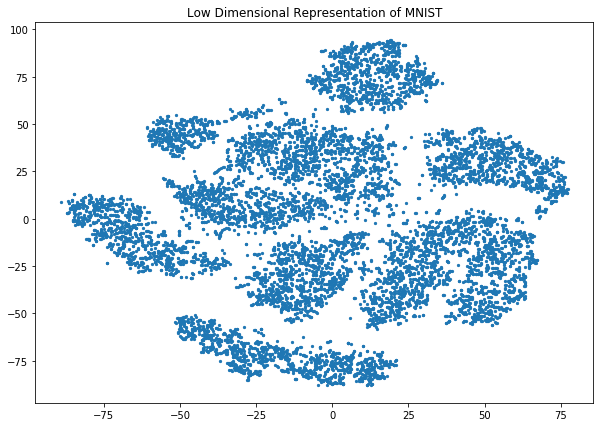

In [9]:
plt.figure(figsize=(10, 7))
plt.scatter(mnist_tsne[:,0], mnist_tsne[:,1], s=5)
plt.title('Low Dimensional Representation of MNIST');

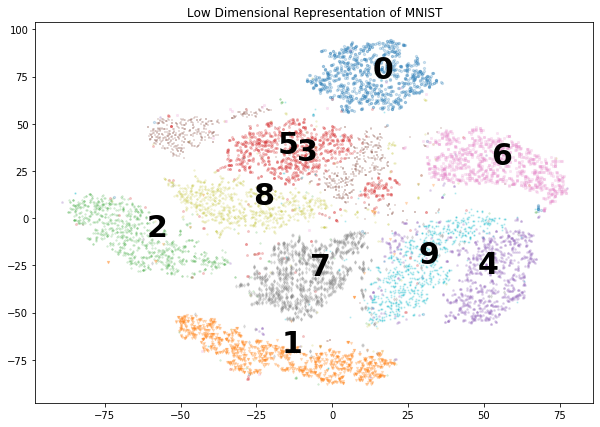

In [10]:
MARKER = ['o', 'v', '1', 'p' ,'*', '+', 'x', 'd', '4', '.']
plt.figure(figsize=(10, 7))
plt.title('Low Dimensional Representation of MNIST');
for i in range(10):
    selections = mnist_tsne[mnist['labels'] == i]
    plt.scatter(selections[:,0], selections[:,1], alpha=0.2, marker=MARKER[i], s=5);
    x, y = selections.mean(axis=0)
    plt.text(x, y, str(i), fontdict={'weight': 'bold', 'size': 30})

In [11]:
threes = np.where(mnist['labels'] == 3)[0]
threes

array([   7,   10,   12, ..., 9974, 9977, 9991], dtype=int64)

In [12]:
tsne_threes = mnist_tsne[threes]
far_threes = np.where(tsne_threes[:,0]< 0)[0]
far_threes

array([   0,    1,    2,    3,    6,    7,    8,   10,   11,   12,   13,
         14,   16,   17,   18,   19,   21,   22,   23,   25,   26,   29,
         30,   31,   32,   33,   34,   35,   36,   37,   38,   39,   40,
         41,   42,   43,   44,   45,   46,   48,   49,   50,   51,   52,
         53,   54,   55,   56,   57,   58,   59,   60,   61,   62,   63,
         65,   66,   67,   68,   69,   71,   72,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   89,
         90,   91,   93,   94,   95,   96,   97,   98,   99,  101,  102,
        103,  104,  105,  107,  109,  110,  111,  112,  113,  114,  115,
        116,  120,  121,  122,  123,  124,  126,  127,  128,  129,  131,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  150,  151,  152,  153,  154,  155,
        157,  158,  159,  160,  161,  162,  163,  164,  165,  166,  167,
        168,  169,  170,  171,  172,  173,  174,  1

In [13]:
tsne_threes[far_threes]

array([[-29.675064 ,  29.103918 ],
       [-16.251925 ,  30.717562 ],
       [ -0.6181962,  35.613228 ],
       ...,
       [-29.0653   ,  40.333878 ],
       [-25.001787 ,  36.527924 ],
       [-17.755049 ,  44.24846  ]], dtype=float32)

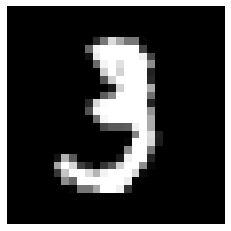

In [14]:
plt.imshow(mnist['images'][10], cmap='gray')
plt.axis('off');